In [ ]:
!pip install Keras-Preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 663.1 kB/s eta 0:00:00


In [ ]:
import numpy as np
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from textwrap import wrap
from collections import Counter
import tensorflow as tf
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score,recall_score,f1_score
import pickle
import plotly.express as px
from keras_preprocessing.sequence import pad_sequences
from keras_preprocessing.sequence import pad_sequences as pad
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM,Dense,Embedding,SpatialDropout1D
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import  confusion_matrix
import seaborn
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import cufflinks as cf
import tensorflow
import keras
from tensorflow.keras import Sequential
from plotly.offline import iplot
py.offline.init_notebook_mode(connected=True)
cf.go_offline()
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D, Dense, LSTM, Conv1D, Embedding
import os

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_excel('/content/New_sentiment.xlsx')

In [ ]:
df

,comment,sentiment
0,Best Of Luck Captain.,Positive
1,"Inshallah, there will be a battle in the World...",Positive
2,Whole Bangladesh is waiting for something bett...,Neutral
3,All will win inshallah.,Positive
4,Bangladesh will bring the World Cup trophy in ...,Positive
...,...,...
1917,Best wishes,Positive
1918,The answer was given on the field with a bat. ...,Positive
1919,Good job dear Mashrafe.,Positive
1920,Good luck.,Positive


In [ ]:
df.head()

,comment,sentiment
0,Best Of Luck Captain.,Positive
1,"Inshallah, there will be a battle in the World...",Positive
2,Whole Bangladesh is waiting for something bett...,Neutral
3,All will win inshallah.,Positive
4,Bangladesh will bring the World Cup trophy in ...,Positive


In [ ]:
len(df)

1922

In [ ]:
df['sentiment'].value_counts()

Positive    794
Neutral     674
Negative    454
Name: sentiment, dtype: int64

In [ ]:
df.sample(10)

,comment,sentiment
1748,"""Mashrafe, you have always been a role model ...",Positive
368,Be legendary brother... I want to see you in a...,Positive
579,Tamim Iqbal Khan was my first inspiration to w...,Positive
1506,"CAPTAIN Whatever you say, it will be of no use...",Neutral
1763,"Masha-Allah, it's awesome!",Positive
438,You are too emotional.,Negative
1459,Awami League was like a dice.\nPahe Yagahala! ...,Neutral
191,we want a better strike rate in Tests too.,Neutral
637,Dear Mushfiq for your spectacular performance...,Positive
1419,Jehyomelam Rena Mashrami bhai.,Neutral


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1922 entries, 0 to 1921
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   comment    1920 non-null   object
 1   sentiment  1922 non-null   object
dtypes: object(2)
memory usage: 30.2+ KB


In [ ]:
df.describe()

,comment,sentiment
count,1920,1922
unique,1555,3
top,You are a successful captain a successful MP a...,Positive
freq,4,794


In [ ]:
df.shape

(1922, 2)

In [ ]:
#Check Null Value
df.isnull().sum()

comment      2
sentiment    0
dtype: int64

In [ ]:
#Delete NAN Row

df.dropna(inplace=True)

In [ ]:
#Again check the Null Value
df.isnull().sum()

comment      0
sentiment    0
dtype: int64

In [ ]:
df.shape

(1920, 2)

In [ ]:
df["sentiment"].unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [ ]:
print(
    "Total Comment:",len(df),
    "\nTotal Positive :",len(df[df.sentiment =='Positive']),
    "\nTotal Negative :",len(df[df.sentiment=='Negative']),
    "\nTotal Neutral :",len(df[df.sentiment =='Neutral'])
    )

Total Comment: 1920 
Total Positive : 794 
Total Negative : 454 
Total Neutral : 672


In [ ]:
df['sentiment'].value_counts()

Positive    794
Neutral     672
Negative    454
Name: sentiment, dtype: int64

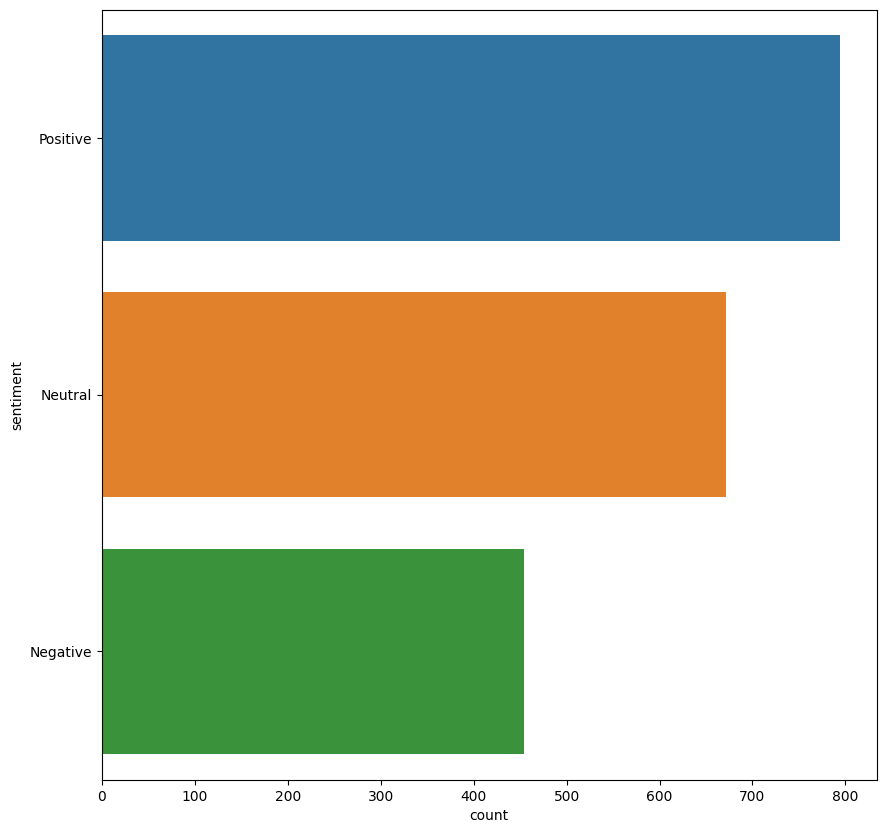

In [ ]:
plt.subplots(figsize = (10,10))
sns.countplot(y='sentiment', data=df)
plt.show()


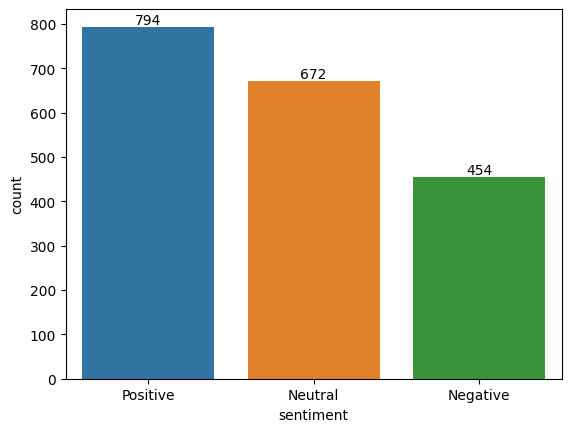

In [ ]:
df1 = sns.countplot(x='sentiment' , data = df)

for bars in df1.containers:
  df1.bar_label(bars)

In [ ]:
#Data Preperation and Cleaning
df["Lower"] = df["comment"].str.lower()
df.head()

,comment,sentiment,Lower
0,Best Of Luck Captain.,Positive,best of luck captain.
1,"Inshallah, there will be a battle in the World...",Positive,"inshallah, there will be a battle in the world..."
2,Whole Bangladesh is waiting for something bett...,Neutral,whole bangladesh is waiting for something bett...
3,All will win inshallah.,Positive,all will win inshallah.
4,Bangladesh will bring the World Cup trophy in ...,Positive,bangladesh will bring the world cup trophy in ...


In [ ]:
#Seperate Row as Category Wise
mask = df['comment'] == "Positive"
Positive = df[mask]
mask = df['comment']  == "Negative"
Negative = df[mask]
mask = df['comment'] == "Neutral"
Neutral = df[mask]


In [ ]:
#Removal of Punctuations

import string
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

df["puncuation"] = df["Lower"].apply(lambda text: remove_punctuation(text))
df.head()


,comment,sentiment,Lower,puncuation
0,Best Of Luck Captain.,Positive,best of luck captain.,best of luck captain
1,"Inshallah, there will be a battle in the World...",Positive,"inshallah, there will be a battle in the world...",inshallah there will be a battle in the world cup
2,Whole Bangladesh is waiting for something bett...,Neutral,whole bangladesh is waiting for something bett...,whole bangladesh is waiting for something bett...
3,All will win inshallah.,Positive,all will win inshallah.,all will win inshallah
4,Bangladesh will bring the World Cup trophy in ...,Positive,bangladesh will bring the world cup trophy in ...,bangladesh will bring the world cup trophy in ...


In [ ]:
#Removing stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import string
from nltk.corpus import stopwords

def process_text(text):
    no_punc = [char for char in text if char not in string.punctuation]
    no_punc = ''.join(no_punc)


    return ' '.join([word for word in no_punc.split() if word.lower() not in stopwords.words('english')])



In [ ]:
df['stopwords']=df['puncuation'].apply(process_text)


In [ ]:
#Stemming
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def stemming (text):
    return ''.join([stemmer.stem(word) for word in text])

df['stemming']=df['stopwords'].apply(stemming)
df.head()


,comment,sentiment,Lower,puncuation,stopwords,stemming
0,Best Of Luck Captain.,Positive,best of luck captain.,best of luck captain,best luck captain,best luck captain
1,"Inshallah, there will be a battle in the World...",Positive,"inshallah, there will be a battle in the world...",inshallah there will be a battle in the world cup,inshallah battle world cup,inshallah battle world cup
2,Whole Bangladesh is waiting for something bett...,Neutral,whole bangladesh is waiting for something bett...,whole bangladesh is waiting for something bett...,whole bangladesh waiting something better,whole bangladesh waiting something better
3,All will win inshallah.,Positive,all will win inshallah.,all will win inshallah,win inshallah,win inshallah
4,Bangladesh will bring the World Cup trophy in ...,Positive,bangladesh will bring the world cup trophy in ...,bangladesh will bring the world cup trophy in ...,bangladesh bring world cup trophy hands,bangladesh bring world cup trophy hands


In [ ]:
df.drop(["comment","Lower","puncuation","stopwords"],axis=1,inplace=True)

In [ ]:
df.head()

,sentiment,stemming
0,Positive,best luck captain
1,Positive,inshallah battle world cup
2,Neutral,whole bangladesh waiting something better
3,Positive,win inshallah
4,Positive,bangladesh bring world cup trophy hands


In [ ]:
#Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))

X = cv.fit_transform(df['stemming'])

In [ ]:
X.shape

(1920, 5000)

In [ ]:
# remove emojis
def remove_emojis(text):
  emojis_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
  return emojis_pattern.sub(r'',text)

In [ ]:
df

,sentiment,stemming
0,Positive,best luck captain
1,Positive,inshallah battle world cup
2,Neutral,whole bangladesh waiting something better
3,Positive,win inshallah
4,Positive,bangladesh bring world cup trophy hands
...,...,...
1917,Positive,best wishes
1918,Positive,answer given field bat tamim always needed ban...
1919,Positive,good job dear mashrafe
1920,Positive,good luck


In [ ]:
y = df['sentiment']
y

0       Positive
1       Positive
2        Neutral
3       Positive
4       Positive
          ...   
1917    Positive
1918    Positive
1919    Positive
1920    Positive
1921    Positive
Name: sentiment, Length: 1920, dtype: object

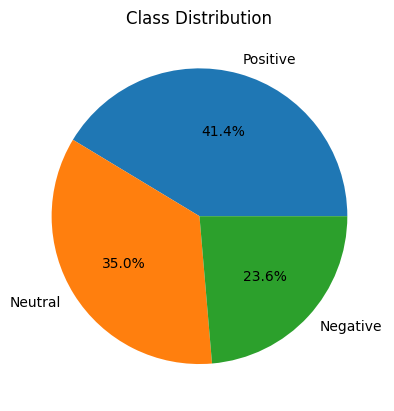

In [ ]:
class_counts = df['sentiment'].value_counts()
class_percents = class_counts / class_counts.sum() * 100
# Plot the pie chart
plt.pie(class_percents, labels=class_counts.index, autopct='%1.1f%%')
plt.title('Class Distribution')
plt.savefig("my_plot.png")
plt.show()

In [ ]:
#Splitting the data into test and training data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [ ]:
#algorithm
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import metrics

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(X_train,y_train)
predmnb = nb.predict(X_test)
print("Confusion Matrix for Multinomial Naive Bayes:")
print(confusion_matrix(y_test,predmnb))
print("Score:",round(accuracy_score(y_test,predmnb)*100,2))
print("Classification Report:")
print(classification_report(y_test,predmnb))
# cross_val_mnb = cross_val_score(nb, X, y, cv=5)
# print("5-flod Cross Validation Score: ", round(cross_val_nb.mean()*100,2))

Confusion Matrix for Multinomial Naive Bayes:
[[ 46  14  17]
 [ 23  74  42]
 [ 11   6 151]]
Score: 70.57
Classification Report:
              precision    recall  f1-score   support

    Negative       0.57      0.60      0.59        77
     Neutral       0.79      0.53      0.64       139
    Positive       0.72      0.90      0.80       168

    accuracy                           0.71       384
   macro avg       0.69      0.68      0.67       384
weighted avg       0.71      0.71      0.70       384



In [ ]:
y_pred = nb.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

    Negative       0.57      0.60      0.59        77
     Neutral       0.79      0.53      0.64       139
    Positive       0.72      0.90      0.80       168

    accuracy                           0.71       384
   macro avg       0.69      0.68      0.67       384
weighted avg       0.71      0.71      0.70       384



In [ ]:
acc1=round(accuracy_score(y_test,predmnb)*100,2)
print("Accuracy:",acc1,"%")

Accuracy: 70.57 %


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
preddt = dt.predict(X_test)
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test,preddt))
print("Score:",round(accuracy_score(y_test,preddt)*100,2))
print("Classification Report:")
print(classification_report(y_test,preddt))
# cross_val_dt = cross_val_score(dt, X, y, cv=5)
# print("5-flod Cross Validation Score: ", round(cross_val_dt.mean()*100,2))

Confusion Matrix for Decision Tree:
[[ 39  12  26]
 [ 12 109  18]
 [ 24  19 125]]
Score: 71.09
Classification Report:
              precision    recall  f1-score   support

    Negative       0.52      0.51      0.51        77
     Neutral       0.78      0.78      0.78       139
    Positive       0.74      0.74      0.74       168

    accuracy                           0.71       384
   macro avg       0.68      0.68      0.68       384
weighted avg       0.71      0.71      0.71       384



In [ ]:
acc2=round(accuracy_score(y_test,preddt)*100,2)
print("Accuracy:",acc2,"%")

Accuracy: 71.09 %


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rmfr = RandomForestClassifier()
rmfr.fit(X_train,y_train)
predrmfr = rmfr.predict(X_test)
print("Confusion Matrix for Random Forest Classifier:")
print(confusion_matrix(y_test,predrmfr))
print("Score:",round(accuracy_score(y_test,predrmfr)*100,2))
print("Classification Report:")
print(classification_report(y_test,predrmfr))
# cross_val_rmfr = cross_val_score(rmfr, X, y, cv=5)
# print("5-flod Cross Validation Score: ", round(cross_val_rmfr.mean()*100,2))

Confusion Matrix for Random Forest Classifier:
[[ 49   6  22]
 [ 19 106  14]
 [ 16   6 146]]
Score: 78.39
Classification Report:
              precision    recall  f1-score   support

    Negative       0.58      0.64      0.61        77
     Neutral       0.90      0.76      0.82       139
    Positive       0.80      0.87      0.83       168

    accuracy                           0.78       384
   macro avg       0.76      0.76      0.76       384
weighted avg       0.79      0.78      0.79       384



In [ ]:
acc3=round(accuracy_score(y_test,predrmfr)*100,2)
print("Accuracy:",acc3,"%")

Accuracy: 78.39 %


In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)
predsvm = svm.predict(X_test)
print("Confusion Matrix for Support Vector Machines:")
print(confusion_matrix(y_test,predsvm))
print("Score:",round(accuracy_score(y_test,predsvm)*100,2))
print("Classification Report:")
print(classification_report(y_test,predsvm))
# cross_val_svm = cross_val_score(svm, X, y, cv=5)
# print("5-flod Cross Validation Score: ", round(cross_val_svm.mean()*100,2))

Confusion Matrix for Support Vector Machines:
[[ 35  14  28]
 [  4 105  30]
 [  4  10 154]]
Score: 76.56
Classification Report:
              precision    recall  f1-score   support

    Negative       0.81      0.45      0.58        77
     Neutral       0.81      0.76      0.78       139
    Positive       0.73      0.92      0.81       168

    accuracy                           0.77       384
   macro avg       0.78      0.71      0.73       384
weighted avg       0.78      0.77      0.76       384



In [ ]:
acc4=round(accuracy_score(y_test,predsvm)*100,2)
print("Accuracy:",acc4,"%")

Accuracy: 76.56 %


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
predknn = knn.predict(X_test)
print("Confusion Matrix for K Neighbors Classifier:")
print(confusion_matrix(y_test,predknn))
print("Score: ",round(accuracy_score(y_test,predknn)*100,2))
print("Classification Report:")
print(classification_report(y_test,predknn))
# cross_val_knn = cross_val_score(knn, X, y, cv=5)
# print("5-flod Cross Validation Score: ", round(cross_val_knn.mean()*100,2))

Confusion Matrix for K Neighbors Classifier:
[[ 37   3  37]
 [ 66  27  46]
 [ 35   6 127]]
Score:  49.74
Classification Report:
              precision    recall  f1-score   support

    Negative       0.27      0.48      0.34        77
     Neutral       0.75      0.19      0.31       139
    Positive       0.60      0.76      0.67       168

    accuracy                           0.50       384
   macro avg       0.54      0.48      0.44       384
weighted avg       0.59      0.50      0.47       384



In [ ]:
acc5=round(accuracy_score(y_test,predknn)*100,2)
print("Accuracy:",acc5,"%")

Accuracy: 49.74 %


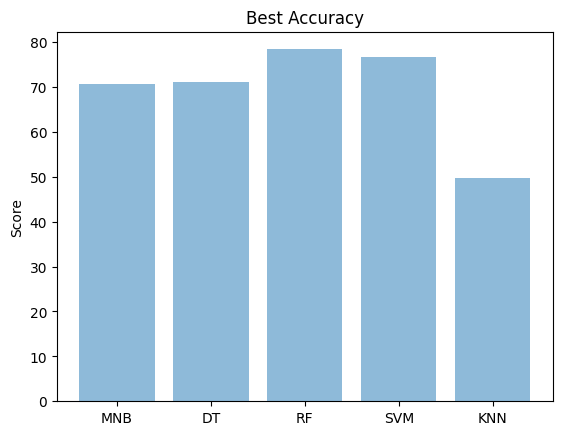

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('MNB','DT','RF','SVM','KNN')
y_pos = np.arange(len(objects))
performance = [acc1,acc2,acc3,acc4,acc5]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Score')
plt.title('Best Accuracy')

plt.show()

In [ ]:
pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 19.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
from matplotlib import pyplot as plt


classifiers = [DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=10),
               RandomForestClassifier(),
               MultinomialNB(alpha = 1.5, fit_prior = True),
               XGBClassifier(),
               SVC(),
               KNeighborsClassifier(metric = 'manhattan', n_neighbors = 15, weights = 'uniform')]
for cls in classifiers:
    cls.fit(X_train,y_train)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls,
                          X_test,
                          y_test,
                          ax=ax,
                          cmap='Blues')
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()
plt.savefig('confusion_matrix.jpg')

ValueError: ignored

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
predxgb = xgb.predict(X_test)
print("Confusion Matrix for xgboost Classifier:")
print(confusion_matrix(y_test,predxgb))
print("Score: ",round(accuracy_score(y_test,predxgb)*100,2))
print("Classification Report:")
print(classification_report(y_test,predxgb))
# cross_val_xgb = cross_val_score(xgb, X, y, cv=5)
# print("5-flod Cross Validation Score: ", round(cross_val_xgb.mean()*100,2))

ValueError: ignored

In [ ]:
import itertools
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
cv.get_feature_names()[0:-1]

AttributeError: ignored

In [ ]:
cv = CountVectorizer(max_features=2000, ngram_range=(1,3))
x = cv.fit_transform(comments).toarray()
x.shape

NameError: ignored

In [ ]:
feature_names = cv.get_feature_names()

AttributeError: ignored

In [ ]:
pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 20.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(nb,X_test,y_test)
